In [1]:
import sklearn
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


In [2]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [3]:
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


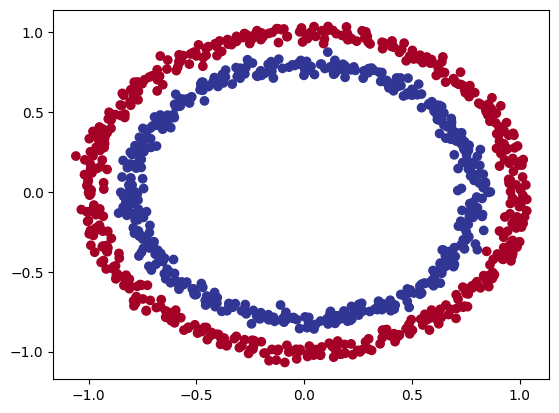

In [4]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
X_sample = X[0]
y_sample = y[0]


print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [7]:
import torch
torch.__version__

'2.2.0.dev20230922+cu121'

In [8]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5] , y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [9]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [11]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [12]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [13]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [14]:
from torch import nn
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)
    
    def forward(self, x):
        return self.layer_2(self.layer_1(x))
    
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [15]:
model_0.parameters()

<generator object Module.parameters at 0x0000025E8A7F6260>

In [16]:
next(model_0.parameters())

Parameter containing:
tensor([[ 0.0834, -0.3290],
        [-0.4644, -0.6166],
        [-0.5037,  0.6303],
        [ 0.4665,  0.2251],
        [-0.3366,  0.1346]], device='cuda:0', requires_grad=True)

In [17]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [18]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)

model_0.to(device=device)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1633,  0.2263],
                      [-0.0499, -0.1277],
                      [ 0.2378, -0.3586],
                      [ 0.5030, -0.0107],
                      [-0.5418, -0.3035]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.3948,  0.5828, -0.0519, -0.1769,  0.7005], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0966, -0.0550,  0.0499, -0.2429, -0.2103]], device='cuda:0')),
             ('1.bias', tensor([0.2390], device='cuda:0'))])

In [20]:
# Make predictions

with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))

print(f"Length of predidctions: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, shape: {X_test.shape}")
print(f"First 10 Predictions: {untrained_preds[:10]}")
print(f"\n First 10 Test Labels: {y_test[:10]}")


Length of predidctions: 200, shape: torch.Size([200, 1])
Length of test samples: 200, shape: torch.Size([200, 2])
First 10 Predictions: tensor([[0.1946],
        [0.2124],
        [0.1204],
        [0.2157],
        [0.0768],
        [0.0880],
        [0.1727],
        [0.1435],
        [0.1223],
        [0.2131]], device='cuda:0')

 First 10 Test Labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [21]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [22]:
# Setup loss function and optimizer

# loss_fn = nn.BCELoss() #BCELoss requires inputs to go through sigmoid activation first
loss_fn = nn.BCEWithLogitsLoss() #BCEwithLogitsLoss is the loss function for binary classification with sigmoid activation
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1633,  0.2263],
                      [-0.0499, -0.1277],
                      [ 0.2378, -0.3586],
                      [ 0.5030, -0.0107],
                      [-0.5418, -0.3035]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.3948,  0.5828, -0.0519, -0.1769,  0.7005], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0966, -0.0550,  0.0499, -0.2429, -0.2103]], device='cuda:0')),
             ('1.bias', tensor([0.2390], device='cuda:0'))])

In [6]:
# calculate accuracy

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [25]:
# Training a model
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.1946],
        [0.2124],
        [0.1204],
        [0.2157],
        [0.0768]], device='cuda:0')

In [26]:
y_preds_probs = torch.sigmoid(y_logits)
y_preds_probs

tensor([[0.5485],
        [0.5529],
        [0.5301],
        [0.5537],
        [0.5192]], device='cuda:0')

In [27]:
# Find the predicted labels
y_preds = torch.round(y_preds_probs)

y_preds_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(), y_preds_labels.squeeze()))

y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

In [28]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [29]:
# Building a training and a test loop
torch.cuda.manual_seed(42)
torch.manual_seed(42)
epochs = 100

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_0.train()
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # if you want to use only BCELoss
    # loss_fn = nn.BCELoss(torch.sigmoid(y_logits), y_train)


    loss = loss_fn(y_logits, # Because we are using BCEWithLogitsLoss
                   y_train)

    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
        test_loss = loss_fn(test_logits, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | Accuracy: {acc:.4f} | Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")


Epoch: 0 | Loss: 0.6954 | Accuracy: 50.0000 | Test Loss: 0.6973 | Test Accuracy: 50.0000
Epoch: 10 | Loss: 0.6938 | Accuracy: 54.0000 | Test Loss: 0.6961 | Test Accuracy: 55.5000
Epoch: 20 | Loss: 0.6933 | Accuracy: 54.1250 | Test Loss: 0.6958 | Test Accuracy: 50.0000
Epoch: 30 | Loss: 0.6931 | Accuracy: 52.6250 | Test Loss: 0.6957 | Test Accuracy: 47.0000
Epoch: 40 | Loss: 0.6931 | Accuracy: 51.3750 | Test Loss: 0.6956 | Test Accuracy: 47.0000
Epoch: 50 | Loss: 0.6930 | Accuracy: 51.2500 | Test Loss: 0.6956 | Test Accuracy: 47.5000
Epoch: 60 | Loss: 0.6930 | Accuracy: 51.1250 | Test Loss: 0.6956 | Test Accuracy: 46.5000
Epoch: 70 | Loss: 0.6930 | Accuracy: 51.0000 | Test Loss: 0.6955 | Test Accuracy: 47.0000
Epoch: 80 | Loss: 0.6930 | Accuracy: 51.2500 | Test Loss: 0.6955 | Test Accuracy: 47.0000
Epoch: 90 | Loss: 0.6930 | Accuracy: 51.3750 | Test Loss: 0.6955 | Test Accuracy: 46.5000


In [30]:
import requests
from pathlib import Path

# Download helper function from learn pytorch repo
if Path("helper_functinons.py").is_file():
    print("helper_functions.py already exists.Skipping download.")
else:
    print("Downloading helper_functions.py")
    url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"
    r = requests.get(url)
    with open("helper_functions.py", mode="wb") as f:
        f.write(r.content)

from helper_functions import plot_predictions, plot_decision_boundary

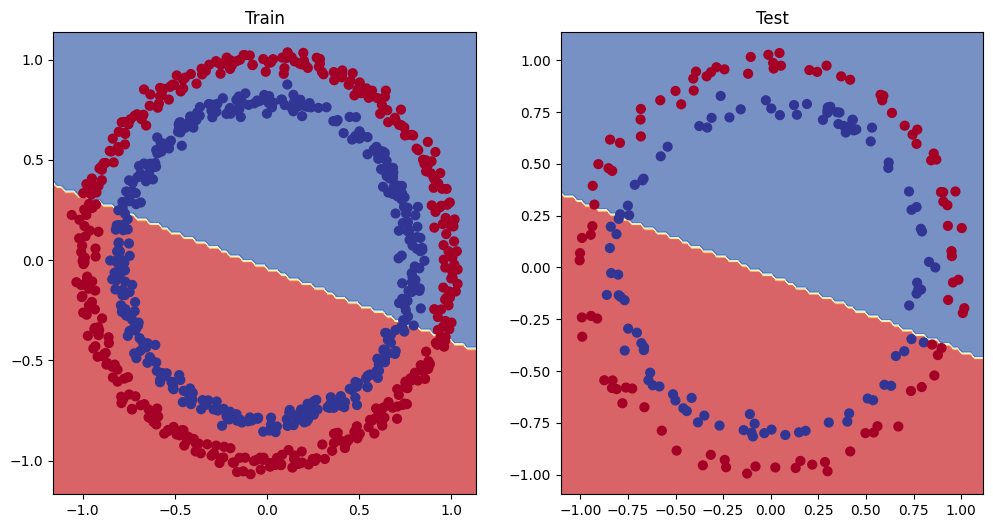

In [31]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [32]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [33]:
# Create loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [34]:
# Write a training and  evaluation loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test  = X_test.to(device)
y_test  = y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)

    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
        test_loss = loss_fn(test_logits, y_test)
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | Accuracy: {acc:.4f} | Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

Epoch: 0 | Loss: 0.6940 | Accuracy: 50.8750 | Test Loss: 0.6926 | Test Accuracy: 51.0000
Epoch: 100 | Loss: 0.6930 | Accuracy: 50.3750 | Test Loss: 0.6938 | Test Accuracy: 48.0000
Epoch: 200 | Loss: 0.6930 | Accuracy: 51.1250 | Test Loss: 0.6944 | Test Accuracy: 46.0000
Epoch: 300 | Loss: 0.6930 | Accuracy: 51.6250 | Test Loss: 0.6946 | Test Accuracy: 45.0000
Epoch: 400 | Loss: 0.6930 | Accuracy: 51.1250 | Test Loss: 0.6946 | Test Accuracy: 46.0000
Epoch: 500 | Loss: 0.6930 | Accuracy: 51.0000 | Test Loss: 0.6947 | Test Accuracy: 46.0000
Epoch: 600 | Loss: 0.6930 | Accuracy: 51.0000 | Test Loss: 0.6947 | Test Accuracy: 46.0000
Epoch: 700 | Loss: 0.6930 | Accuracy: 51.0000 | Test Loss: 0.6947 | Test Accuracy: 46.0000
Epoch: 800 | Loss: 0.6930 | Accuracy: 51.0000 | Test Loss: 0.6947 | Test Accuracy: 46.0000
Epoch: 900 | Loss: 0.6930 | Accuracy: 51.0000 | Test Loss: 0.6947 | Test Accuracy: 46.0000


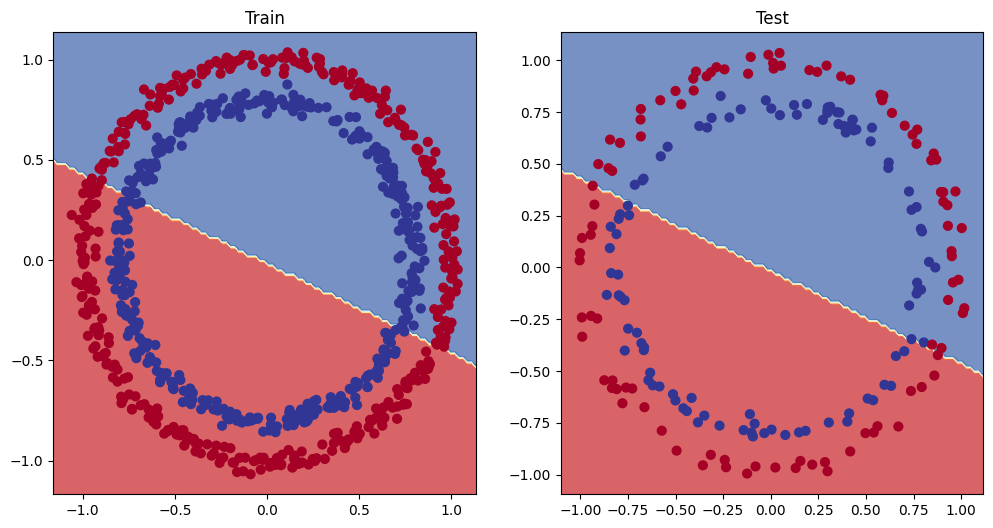

In [35]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [36]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [37]:
# Create train and test splits

train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

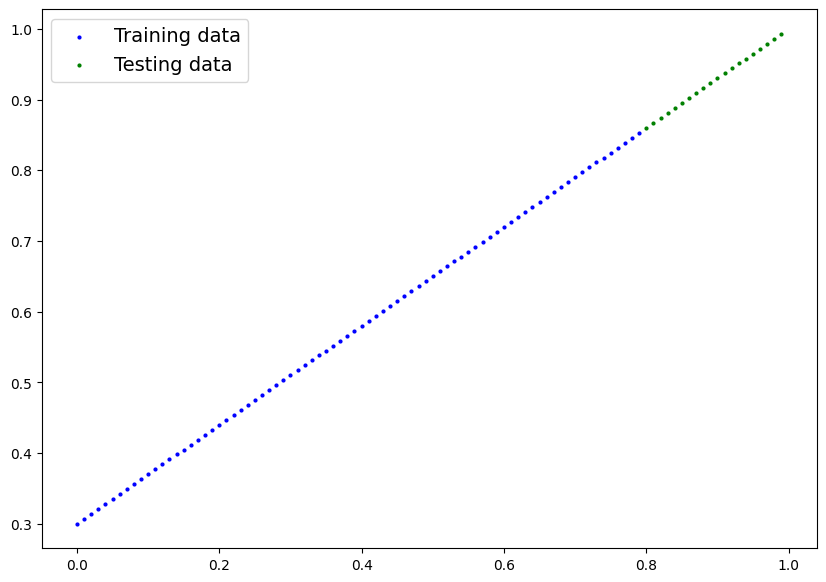

In [38]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [39]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device=device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [40]:
# Loss and optimizer

loss_fn  = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [41]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000
X_train_regression = X_train_regression.to(device)
y_train_regression = y_train_regression.to(device)
X_test_regression = X_test_regression.to(device)
y_test_regression = y_test_regression.to(device)

for epoch in range(epochs):
    model_2.train()

    y_pred = model_2(X_train_regression)

    loss = loss_fn(y_pred, y_train_regression)

    acc = accuracy_fn(y_pred=y_pred, y_true=y_train_regression)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)
        test_acc = accuracy_fn(y_true=y_test_regression, y_pred=test_pred)
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | Accuracy: {acc:.4f} | Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")


Epoch: 0 | Loss: 0.7599 | Accuracy: 0.0000 | Test Loss: 0.9110 | Test Accuracy: 0.0000
Epoch: 100 | Loss: 0.0286 | Accuracy: 0.0000 | Test Loss: 0.0008 | Test Accuracy: 0.0000
Epoch: 200 | Loss: 0.0253 | Accuracy: 0.0000 | Test Loss: 0.0021 | Test Accuracy: 0.0000
Epoch: 300 | Loss: 0.0214 | Accuracy: 0.0000 | Test Loss: 0.0031 | Test Accuracy: 0.0000
Epoch: 400 | Loss: 0.0196 | Accuracy: 0.0000 | Test Loss: 0.0034 | Test Accuracy: 0.0000
Epoch: 500 | Loss: 0.0194 | Accuracy: 0.0000 | Test Loss: 0.0039 | Test Accuracy: 0.0000
Epoch: 600 | Loss: 0.0190 | Accuracy: 0.0000 | Test Loss: 0.0038 | Test Accuracy: 0.0000
Epoch: 700 | Loss: 0.0188 | Accuracy: 0.0000 | Test Loss: 0.0038 | Test Accuracy: 0.0000
Epoch: 800 | Loss: 0.0184 | Accuracy: 0.0000 | Test Loss: 0.0033 | Test Accuracy: 0.0000
Epoch: 900 | Loss: 0.0180 | Accuracy: 0.0000 | Test Loss: 0.0036 | Test Accuracy: 0.0000


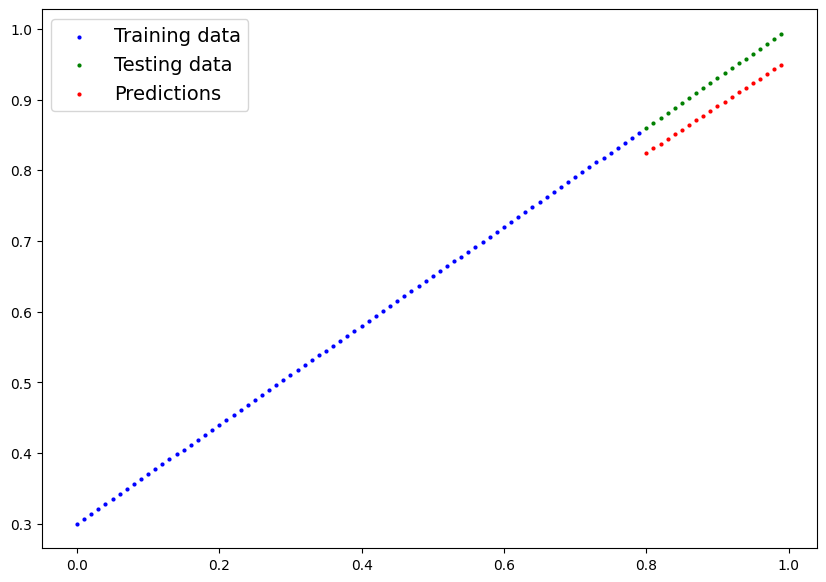

In [52]:
model_2.to(device=device)
model_2.eval()
with torch.inference_mode():
    y_preds = model_2(X_test_regression.to(device))

plot_predictions(train_data=X_train_regression.cpu(), train_labels=y_train_regression.cpu(), test_data=X_test_regression.cpu(), test_labels=y_test_regression.cpu(),predictions=y_preds.cpu())

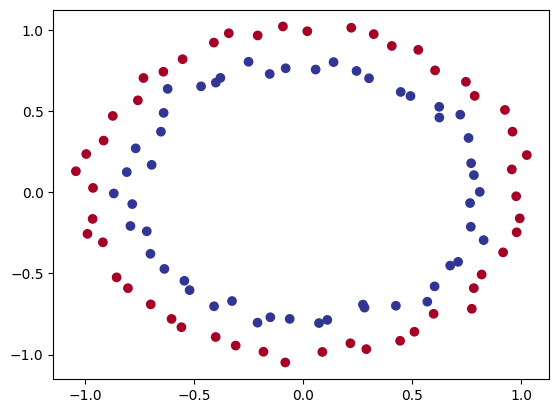

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 100

X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [2]:
import torch 
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]

(tensor([[-0.7182, -0.2408],
         [-0.9960,  0.2350],
         [ 0.2890, -0.9665],
         [ 0.6045,  0.7500],
         [ 0.8273, -0.2954]]),
 tensor([1., 0., 0., 0., 1.]))

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [5]:
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    

model_3 = CircleModelV2().to(device=device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [8]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test  = X_test.to(device)
y_test  = y_test.to(device)

for epoch in range(epochs):
    model_3.train()

    y_logits = model_3(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, y_train)

    acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | Accuracy: {acc:.4f} | Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

Epoch: 0 | Loss: 0.7028 | Accuracy: 45.0000 | Test Loss: 0.6735 | Test Accuracy: 70.0000
Epoch: 100 | Loss: 0.6872 | Accuracy: 55.0000 | Test Loss: 0.7313 | Test Accuracy: 30.0000
Epoch: 200 | Loss: 0.6836 | Accuracy: 55.0000 | Test Loss: 0.7328 | Test Accuracy: 30.0000
Epoch: 300 | Loss: 0.6787 | Accuracy: 55.0000 | Test Loss: 0.7320 | Test Accuracy: 30.0000
Epoch: 400 | Loss: 0.6707 | Accuracy: 55.0000 | Test Loss: 0.7302 | Test Accuracy: 30.0000
Epoch: 500 | Loss: 0.6574 | Accuracy: 67.5000 | Test Loss: 0.7289 | Test Accuracy: 40.0000
Epoch: 600 | Loss: 0.6384 | Accuracy: 73.7500 | Test Loss: 0.7313 | Test Accuracy: 60.0000
Epoch: 700 | Loss: 0.6122 | Accuracy: 77.5000 | Test Loss: 0.7280 | Test Accuracy: 65.0000
Epoch: 800 | Loss: 0.5662 | Accuracy: 83.7500 | Test Loss: 0.6981 | Test Accuracy: 65.0000
Epoch: 900 | Loss: 0.4834 | Accuracy: 91.2500 | Test Loss: 0.6195 | Test Accuracy: 70.0000


In [10]:
model_3.eval()
with torch.inference_mode():
    y_logits = model_3(X_test).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

y_preds[:10], y_test[:10]


(tensor([0., 0., 1., 1., 0., 1., 0., 1., 1., 1.], device='cuda:0'),
 tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1.], device='cuda:0'))

In [12]:
from helper_functions import plot_decision_boundary

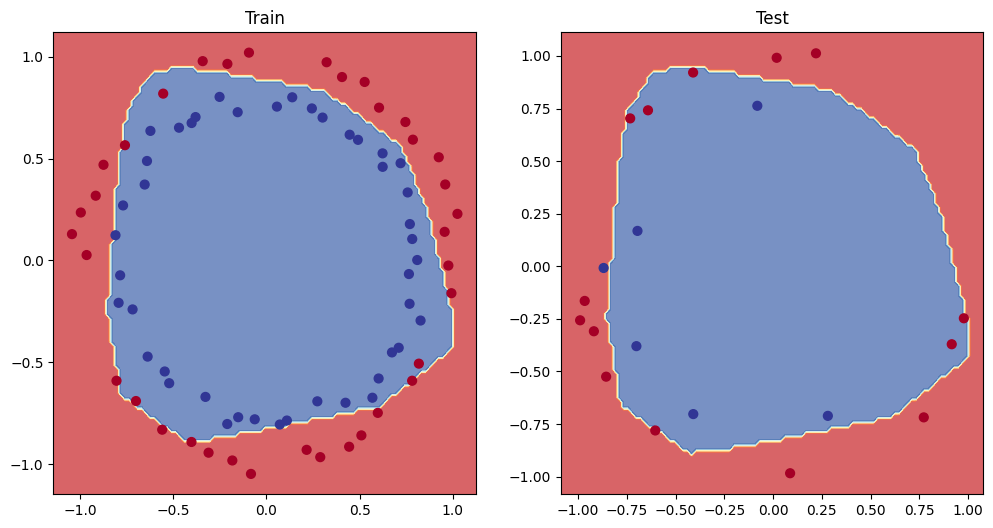

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)